In [11]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("C:\\Training\\Phase 1\\Dataset\\Superstore.csv", encoding = 'Latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [12]:
sales = df["Sales"]

In [13]:
z_scores = np.abs(stats.zscore(sales))

In [27]:
outliers_z = df[z_scores > 3]

In [28]:
print(f"Outliers:" ,outliers_z[["Sales"]])

Outliers:          Sales
27    3083.430
165   8159.952
251   3347.370
262   3059.982
263   2519.958
...        ...
9741  4404.900
9774  2177.584
9857  3393.680
9929  2799.960
9948  2405.200

[127 rows x 1 columns]


In [29]:
Q1 = sales.quantile(0.25)
Q3 = sales.quantile(0.75)
IQR = Q3 - Q1

In [30]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR

In [31]:
outliers_iqr = df[(sales < lower_bound) | (sales > upper_bound)]

In [32]:
print("Outliers using IQR ",outliers_iqr[["Sales"]])

Outliers using IQR           Sales
0     261.9600
1     731.9400
2      14.6200
3     957.5775
4      22.3680
...        ...
9989   25.2480
9990   91.9600
9991  258.5760
9992   29.6000
9993  243.1600

[9994 rows x 1 columns]


In [33]:
outliers_z.to_csv("outliers_zscore.csv", index=False)
outliers_iqr.to_csv("outliers_iqr.csv", index=False)

Text(0.5, 1.0, 'Boxplot of Sales (Outlier Detection)')

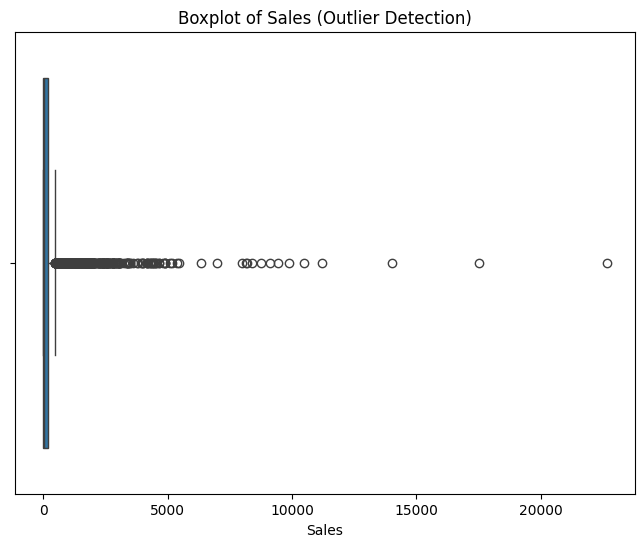

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Sales"])
plt.title("Boxplot of Sales (Outlier Detection)")


Text(0.5, 1.0, 'Sales Data with Outliers Highlighted')

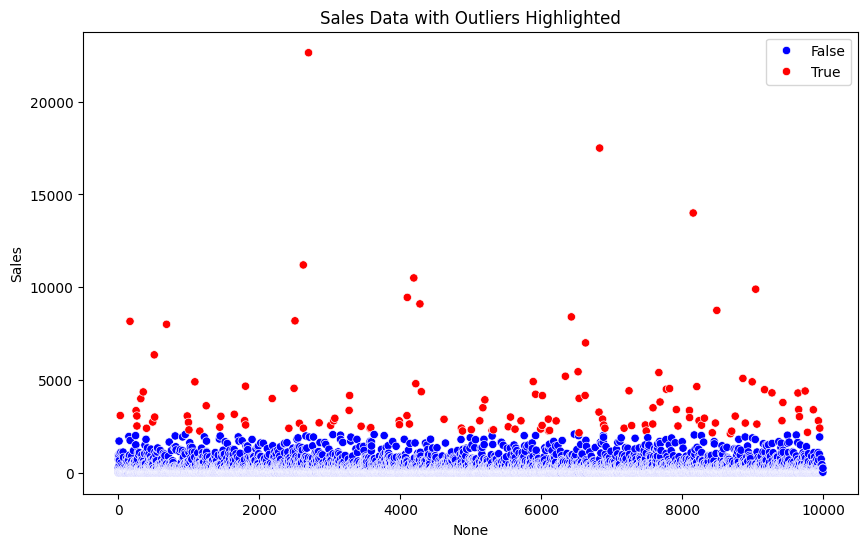

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df["Sales"], hue=z_scores > 3, palette={False: "blue", True: "red"})
plt.title("Sales Data with Outliers Highlighted")